In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics 
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns 
import json
import nltk
import string
import re
import xgboost as xgb


In [2]:
main_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

main_df = main_df.append(test_df)

# 1. PreProcessing

In [3]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.washingtonpost.com/blogs/early-lead...,"{""title"":""Nebraska California State Bakersfiel...",science_technology,0.58916,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,1,60,0,4362,613,15,0.101142,0.062878,0.0,1773
1,http://www.holiday-rentals.co.uk/info/holiday-...,"{""title"":""Travel Cookbook Discover holiday hom...",?,?,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,30,?,1662,76,5,0.000000,0.107623,1.0,1558
2,http://www.huffingtonpost.com/2011/10/27/lefto...,"{""title"":""5 Ways With Leftover Rice 5 ways wit...",business,0.237643,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,1,58,0,3075,375,3,0.197333,0.078125,1.0,7148
3,http://www.sun-sentinel.com/,"{""title"":""South Florida Broward Palm Beach and...",?,?,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,1,76,1,2538,491,0,0.358452,0.017442,0.0,565
4,http://socoting.com/protecting-and-serving/,"{""url"":""socoting protecting and serving"",""titl...",law_crime,0.245723,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,23,0,468,21,3,0.047619,0.109756,1.0,2606


## 1.1 Checking for NULL and "?" values

In [4]:
main_df.isna().sum()

url                              0
webpageDescription               0
alchemy_category                 0
alchemy_category_score           0
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
framebased                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                           0
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews                  0
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
label                         1479
id                               0
dtype: int64

No Null Values exist

In [5]:
(main_df == '?').sum()

url                              0
webpageDescription               0
alchemy_category              2318
alchemy_category_score        2318
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
framebased                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                        2854
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews               1227
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
label                            0
id                               0
dtype: int64

In [6]:
(main_df["isNews"] == '?').sum()

2854

In [7]:
main_df["isNews"].value_counts()

1    4541
?    2854
Name: isNews, dtype: int64

Assuming the other 2843 rows are not news. Making the '?' values to 0

In [8]:
main_df["isNews"].replace("?", 0, inplace = True)

In [9]:
main_df["isNews"].value_counts()

1    4541
0    2854
Name: isNews, dtype: int64

In [10]:
(main_df["isFrontPageNews"] == '?').sum()

1227

In [11]:
main_df["isFrontPageNews"].value_counts()

0    5873
?    1227
1     295
Name: isFrontPageNews, dtype: int64

Assuming they are not front page news. Changing the "?" to 0

In [12]:
main_df["isFrontPageNews"].replace("?", 0, inplace = True)
main_df["isFrontPageNews"] = pd.to_numeric(main_df["isFrontPageNews"])

In [13]:
main_df["isFrontPageNews"].value_counts()

0    7100
1     295
Name: isFrontPageNews, dtype: int64

In [14]:
(main_df["alchemy_category_score"] == '?').sum()

2318

In [15]:
main_df["alchemy_category_score"].value_counts()

?            2318
0.85           95
0.0784091      43
0.849999       12
0.70677         8
             ... 
0.730541        1
0.759351        1
0.382677        1
0.511828        1
0.853168        1
Name: alchemy_category_score, Length: 4039, dtype: int64

In [16]:
main_df["alchemy_category_score"] = main_df["alchemy_category_score"].replace('?', np.nan)
main_df["alchemy_category_score"] = pd.to_numeric(main_df["alchemy_category_score"])
main_df["alchemy_category_score"].describe()

count    5077.000000
mean        0.604722
std         0.213726
min         0.070833
25%         0.452251
50%         0.630952
75%         0.782189
max         0.999426
Name: alchemy_category_score, dtype: float64

In [17]:
main_df["alchemy_category_score"].isna().sum()

2318

Mean and Median are almost same. So, replacing nan values with Median

In [18]:
main_df["alchemy_category_score"].fillna(main_df["alchemy_category_score"].median(), inplace=True)
main_df["alchemy_category_score"].describe()

count    7395.000000
mean        0.612944
std         0.177502
min         0.070833
25%         0.540952
50%         0.630952
75%         0.712322
max         0.999426
Name: alchemy_category_score, dtype: float64

In [19]:
main_df["alchemy_category"].describe()

count     7395
unique      14
top          ?
freq      2318
Name: alchemy_category, dtype: object

In [20]:
main_df["alchemy_category"].value_counts()

?                     2318
recreation            1198
arts_entertainment     962
business               873
health                 527
sports                 387
culture_politics       349
computer_internet      293
science_technology     293
gaming                  79
religion                72
law_crime               33
unknown                  6
weather                  5
Name: alchemy_category, dtype: int64

Changing '?' to a new unknown

In [21]:

main_df["alchemy_category"].replace("?", "unknown", inplace = True)

In [22]:
(main_df == '?').sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
label                         0
id                            0
dtype: int64

----------------- all '?' and null values are removed ---------------

## 1.2 Removing useless columns.

<AxesSubplot:>

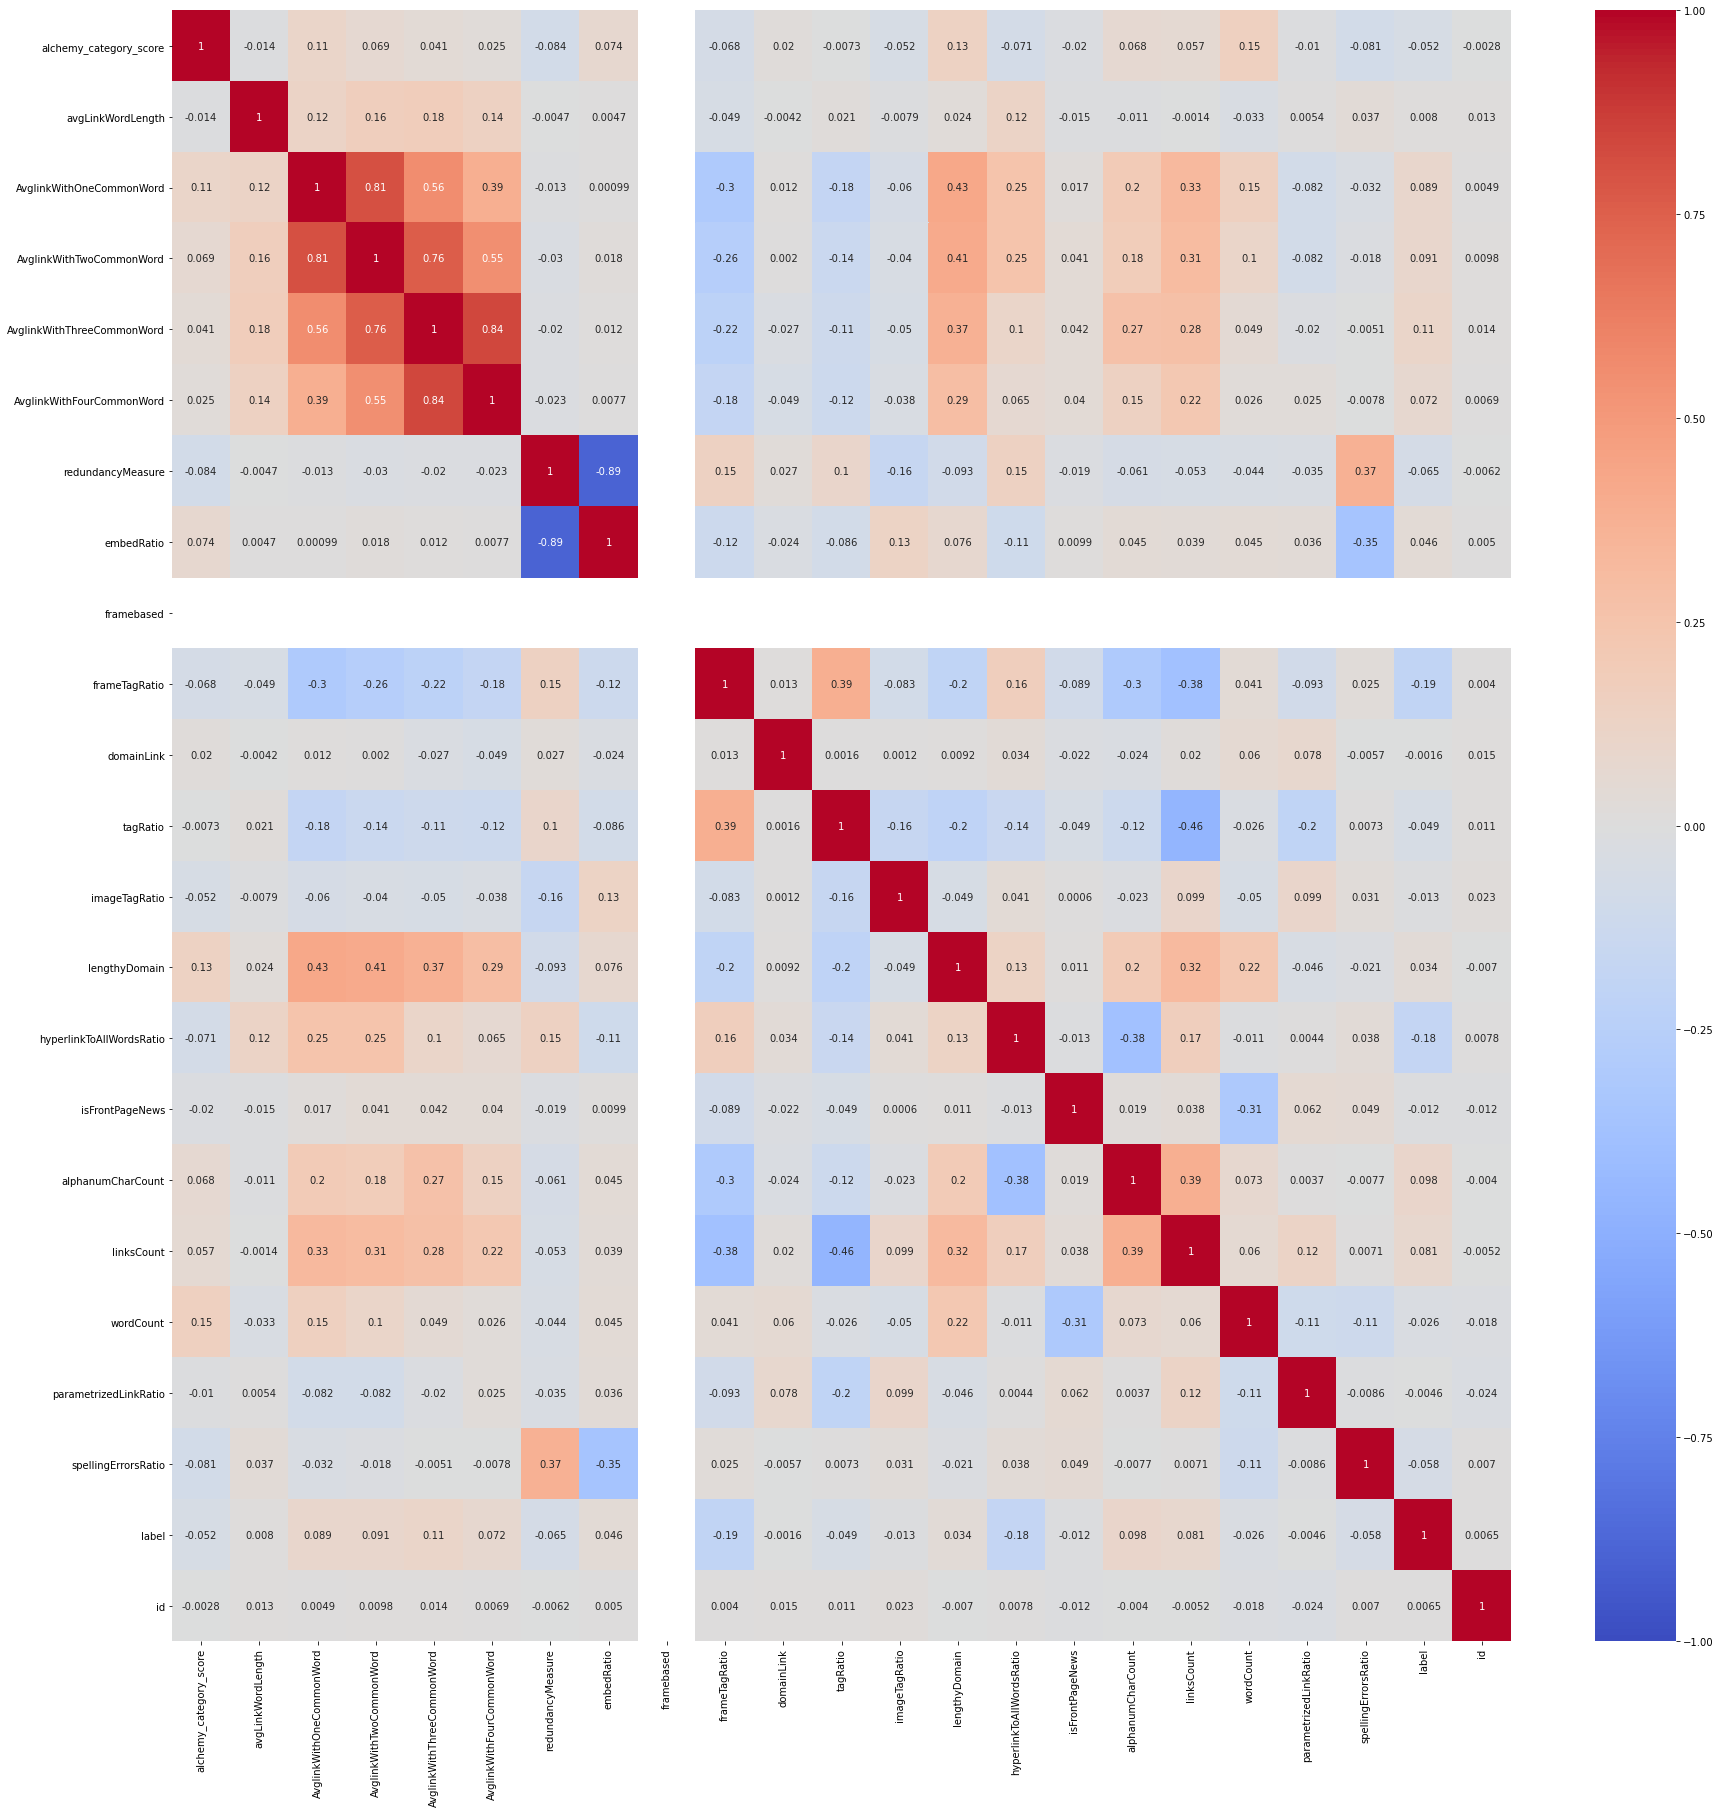

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(main_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [24]:
main_df["isFrontPageNews"].value_counts()

0    7100
1     295
Name: isFrontPageNews, dtype: int64

In [25]:
main_df["framebased"].value_counts()

0    7395
Name: framebased, dtype: int64

In [26]:
main_df["domainLink"].value_counts()

0    7228
1     167
Name: domainLink, dtype: int64

In [27]:
columns_to_be_deleted = ["framebased", "domainLink"]
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

In [28]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.washingtonpost.com/blogs/early-lead...,"{""title"":""Nebraska California State Bakersfiel...",science_technology,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,1,60,0,4362,613,15,0.101142,0.062878,0.0,1773
1,http://www.holiday-rentals.co.uk/info/holiday-...,"{""title"":""Travel Cookbook Discover holiday hom...",unknown,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,30,0,1662,76,5,0.000000,0.107623,1.0,1558
2,http://www.huffingtonpost.com/2011/10/27/lefto...,"{""title"":""5 Ways With Leftover Rice 5 ways wit...",business,0.237643,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,1,58,0,3075,375,3,0.197333,0.078125,1.0,7148
3,http://www.sun-sentinel.com/,"{""title"":""South Florida Broward Palm Beach and...",unknown,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,1,76,1,2538,491,0,0.358452,0.017442,0.0,565
4,http://socoting.com/protecting-and-serving/,"{""url"":""socoting protecting and serving"",""titl...",law_crime,0.245723,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,23,0,468,21,3,0.047619,0.109756,1.0,2606


In [29]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.washingtonpost.com/blogs/early-lead...,"{""title"":""Nebraska California State Bakersfiel...",science_technology,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,1,60,0,4362,613,15,0.101142,0.062878,0.0,1773
1,http://www.holiday-rentals.co.uk/info/holiday-...,"{""title"":""Travel Cookbook Discover holiday hom...",unknown,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,30,0,1662,76,5,0.000000,0.107623,1.0,1558
2,http://www.huffingtonpost.com/2011/10/27/lefto...,"{""title"":""5 Ways With Leftover Rice 5 ways wit...",business,0.237643,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,1,58,0,3075,375,3,0.197333,0.078125,1.0,7148
3,http://www.sun-sentinel.com/,"{""title"":""South Florida Broward Palm Beach and...",unknown,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,1,76,1,2538,491,0,0.358452,0.017442,0.0,565
4,http://socoting.com/protecting-and-serving/,"{""url"":""socoting protecting and serving"",""titl...",law_crime,0.245723,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,23,0,468,21,3,0.047619,0.109756,1.0,2606


## 1.3 Outlier removal

In [30]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [31]:
print(main_df.columns)

Index(['url', 'webpageDescription', 'alchemy_category',
       'alchemy_category_score', 'avgLinkWordLength',
       'AvglinkWithOneCommonWord', 'AvglinkWithTwoCommonWord',
       'AvglinkWithThreeCommonWord', 'AvglinkWithFourCommonWord',
       'redundancyMeasure', 'embedRatio', 'frameTagRatio', 'tagRatio',
       'imageTagRatio', 'isNews', 'lengthyDomain', 'hyperlinkToAllWordsRatio',
       'isFrontPageNews', 'alphanumCharCount', 'linksCount', 'wordCount',
       'parametrizedLinkRatio', 'spellingErrorsRatio', 'label', 'id'],
      dtype='object')


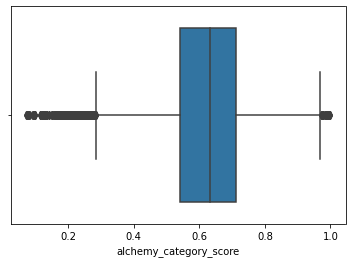

In [32]:
numeric_col = main_df["alchemy_category_score"]
sns.boxplot(x=numeric_col)
plt.show()

In [33]:
outlier_remover = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["alchemy_category_score"] = numeric_col.apply(outlier_remover.removeOutlier)

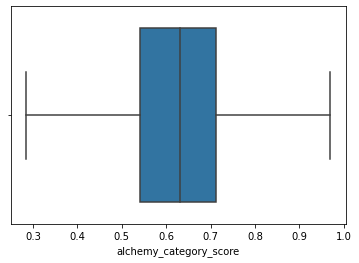

In [34]:
sns.boxplot(x=main_df["alchemy_category_score"])
plt.show()

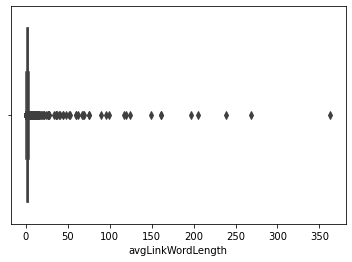

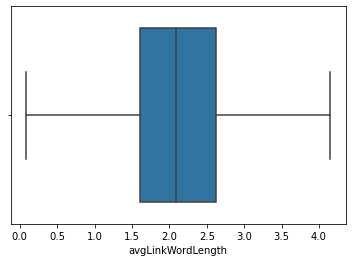

In [35]:
numeric_col = main_df["avgLinkWordLength"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_1 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["avgLinkWordLength"] = numeric_col.apply(outlier_remover_1.removeOutlier)

sns.boxplot(x=main_df["avgLinkWordLength"])
plt.show()

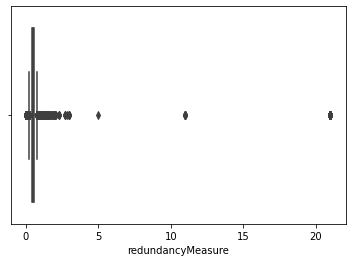

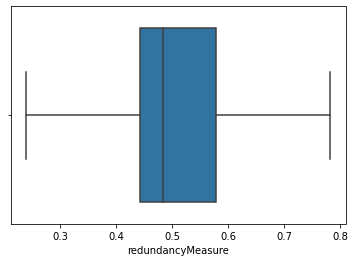

In [36]:
numeric_col = main_df["redundancyMeasure"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_2 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["redundancyMeasure"] = numeric_col.apply(outlier_remover_2.removeOutlier)

sns.boxplot(x=main_df["redundancyMeasure"])
plt.show()

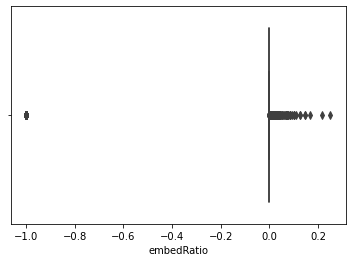

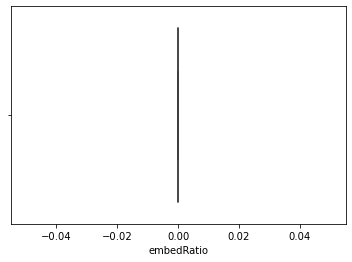

In [37]:
numeric_col = main_df["embedRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_3 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["embedRatio"] = numeric_col.apply(outlier_remover_3.removeOutlier)

sns.boxplot(x=main_df["embedRatio"])
plt.show()

In [38]:
main_df.drop(axis="columns", labels="embedRatio", inplace=True)

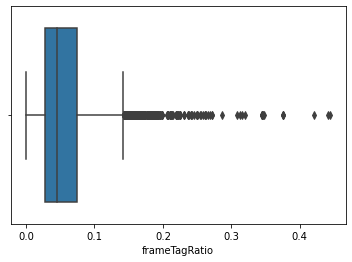

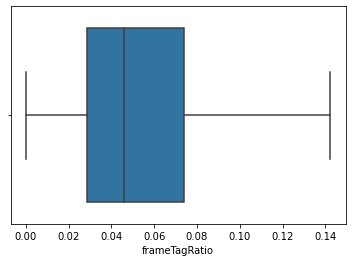

In [39]:
numeric_col = main_df["frameTagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_4 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["frameTagRatio"] = numeric_col.apply(outlier_remover_4.removeOutlier)

sns.boxplot(x=main_df["frameTagRatio"])
plt.show()

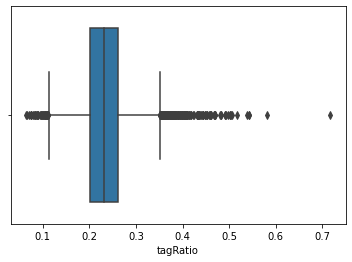

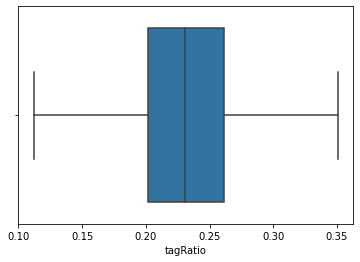

In [40]:
numeric_col = main_df["tagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_5 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["tagRatio"] = numeric_col.apply(outlier_remover_5.removeOutlier)

sns.boxplot(x=main_df["tagRatio"])
plt.show()

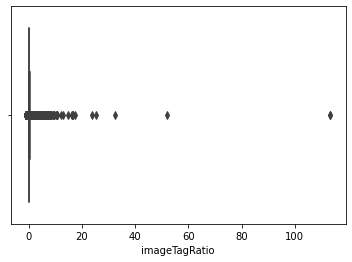

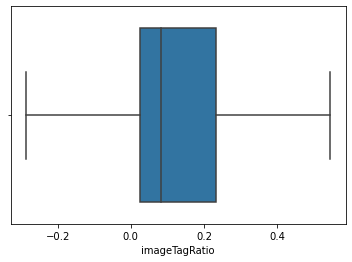

In [41]:
numeric_col = main_df["imageTagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_6 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["imageTagRatio"] = numeric_col.apply(outlier_remover_6.removeOutlier)

sns.boxplot(x=main_df["imageTagRatio"])
plt.show()

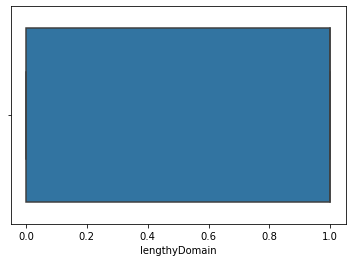

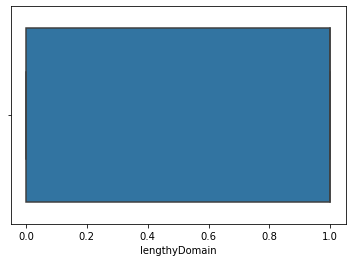

In [42]:
numeric_col = main_df["lengthyDomain"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_7 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["lengthyDomain"] = numeric_col.apply(outlier_remover_7.removeOutlier)

sns.boxplot(x=main_df["lengthyDomain"])
plt.show()

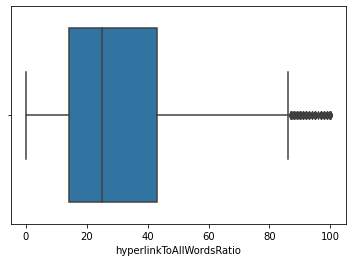

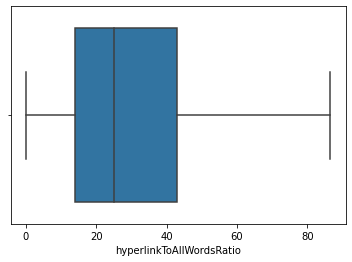

In [43]:
numeric_col = main_df["hyperlinkToAllWordsRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_8 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["hyperlinkToAllWordsRatio"] = numeric_col.apply(outlier_remover_8.removeOutlier)

sns.boxplot(x=main_df["hyperlinkToAllWordsRatio"])
plt.show()

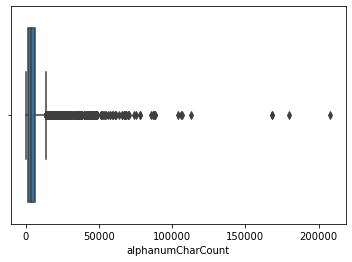

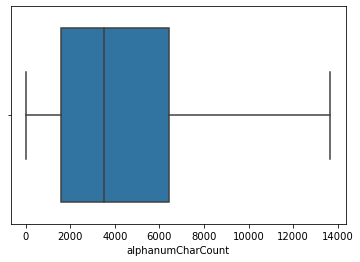

In [44]:
numeric_col = main_df["alphanumCharCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_9 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["alphanumCharCount"] = numeric_col.apply(outlier_remover_9.removeOutlier)

sns.boxplot(x=main_df["alphanumCharCount"])
plt.show()

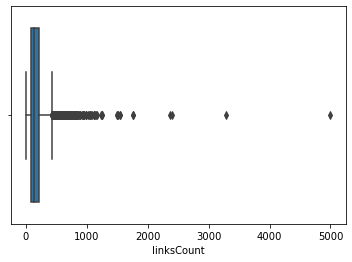

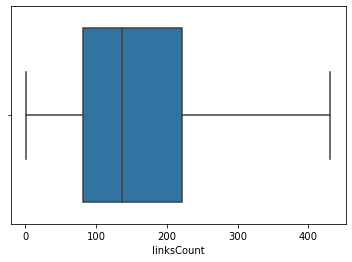

In [45]:
numeric_col = main_df["linksCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_10 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["linksCount"] = numeric_col.apply(outlier_remover_10.removeOutlier)

sns.boxplot(x=main_df["linksCount"])
plt.show()

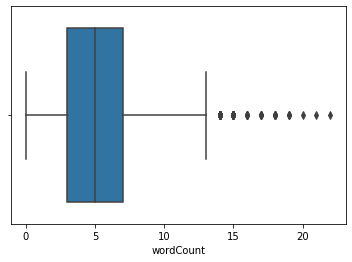

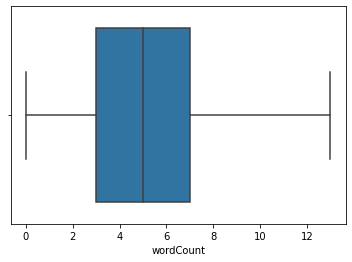

In [46]:
numeric_col = main_df["wordCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_11 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["wordCount"] = numeric_col.apply(outlier_remover_11.removeOutlier)

sns.boxplot(x=main_df["wordCount"])
plt.show()

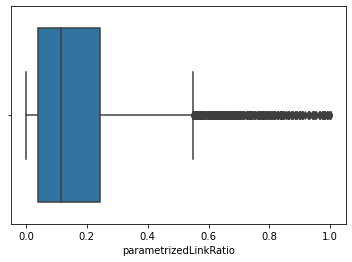

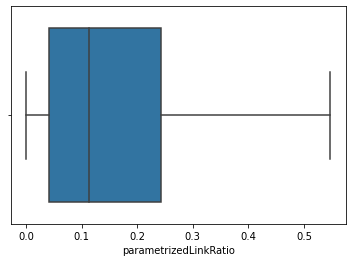

In [47]:
numeric_col = main_df["parametrizedLinkRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_12 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["parametrizedLinkRatio"] = numeric_col.apply(outlier_remover_12.removeOutlier)

sns.boxplot(x=main_df["parametrizedLinkRatio"])
plt.show()

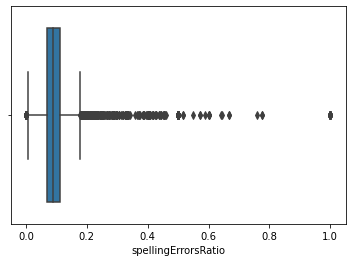

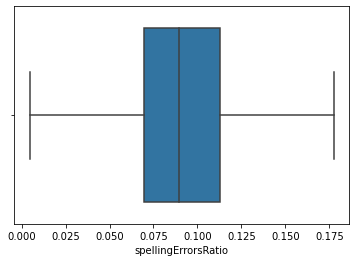

In [48]:
numeric_col = main_df["spellingErrorsRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_13 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["spellingErrorsRatio"] = numeric_col.apply(outlier_remover_13.removeOutlier)

sns.boxplot(x=main_df["spellingErrorsRatio"])
plt.show()

## 1.4 One-hot encoding

In [49]:
main_df["alchemy_category"].value_counts()

unknown               2324
recreation            1198
arts_entertainment     962
business               873
health                 527
sports                 387
culture_politics       349
computer_internet      293
science_technology     293
gaming                  79
religion                72
law_crime               33
weather                  5
Name: alchemy_category, dtype: int64

Alchemy category is one-hot encoded

In [50]:
column_names_to_one_hot = ["alchemy_category"]
main_df = pd.get_dummies(main_df, columns=column_names_to_one_hot)

In [51]:
main_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.washingtonpost.com/blogs/early-lead...,"{""title"":""Nebraska California State Bakersfiel...",0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,0.028002,...,0,0,0,0,0,0,1,0,0,0
1,http://www.holiday-rentals.co.uk/info/holiday-...,"{""title"":""Travel Cookbook Discover holiday hom...",0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,0.072948,...,0,0,0,0,0,0,0,0,1,0
2,http://www.huffingtonpost.com/2011/10/27/lefto...,"{""title"":""5 Ways With Leftover Rice 5 ways wit...",0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,0.054522,...,0,0,0,0,0,0,0,0,0,0
3,http://www.sun-sentinel.com/,"{""title"":""South Florida Broward Palm Beach and...",0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,0.037284,...,0,0,0,0,0,0,0,0,1,0
4,http://socoting.com/protecting-and-serving/,"{""url"":""socoting protecting and serving"",""titl...",0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,0.142339,...,0,0,0,1,0,0,0,0,0,0


## 1.5 Replacing webpageDescription with 2-columns "body", "title".

In [52]:
col = main_df["webpageDescription"]

In [53]:
col_name = "body"
col = col.to_numpy()

In [54]:
col_list = []
for i in range(len(col)):
    a = json.loads(col[i])
    if "body" in a.keys() and a["body"]!=' ':
        col_list.append(a["body"])
    else:
        col_list.append("Unkonown")

In [55]:
main_df.insert(1, col_name, col_list)

In [56]:
col_name = "title"

In [57]:
col_list_title = []
for i in range(len(col)):
    a = json.loads(col[i])
    if "title" in a.keys() and a["title"]!=' ':
        col_list_title.append(a["title"])
    else:
        col_list_title.append("Unkonown")
        
len(col_list_title)  

7395

In [58]:
main_df.insert(1, col_name, col_list_title)

In [59]:
main_df.drop(axis="columns", labels="webpageDescription", inplace=True)

In [60]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.washingtonpost.com/blogs/early-lead...,Nebraska California State Bakersfield in the b...,Print Subscription Today s Paper Discussions G...,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,http://www.holiday-rentals.co.uk/info/holiday-...,Travel Cookbook Discover holiday home owners f...,If you re looking for a truly authentic gastro...,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,http://www.huffingtonpost.com/2011/10/27/lefto...,5 Ways With Leftover Rice 5 ways with leftover...,Do you have leftover rice from last night s di...,0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,http://www.sun-sentinel.com/,South Florida Broward Palm Beach and Miami Dad...,Digital Memberships HOME DELIVERY Place an ad ...,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,http://socoting.com/protecting-and-serving/,SoCoTing Protecting and serving,We believe that the short story is one of the ...,0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


## 1.6 Modifying url column by deleting symbols and strings which are not useful in predictions.

In [61]:
col = main_df["url"]
col = col.to_numpy()
col

array(['http://www.washingtonpost.com/blogs/early-lead/post/nebraska-california-state-bakersfield-in-the-best-rain-delay-ever-video/2012/04/30/gIQAUZdxrT_blog.html',
       'http://www.holiday-rentals.co.uk/info/holiday-ideas/travel-cookbook',
       'http://www.huffingtonpost.com/2011/10/27/leftover-rice-recipes_n_1042537.html',
       ...,
       'http://www.laweekly.com/bestof/2011/award/best-belly-dance-workout-1509632/',
       'http://www.kraftrecipes.com/recipes/buffalo-chicken-burgers-118650.aspx?cm_mmc=eml-_-rbe-_-20110526-_-1020',
       'http://canarygirl.com/?p=80'], dtype=object)

In [62]:
charlist = ['/','?','=','-','_','&','(',')','@','$','%','#',':',';',"<",">","."]
for i in range(len(col)):
    col[i] = col[i].replace('http://', '')
    col[i] = col[i].replace('https://', '')
    col[i] = col[i].replace('www.','').replace('.com','').replace('.org','')
    for j in range(len(charlist)):
        col[i] = col[i].replace(charlist[j],' ')
    col[i] = " ".join(col[i].split()) 
    
    
col

array(['washingtonpost blogs early lead post nebraska california state bakersfield in the best rain delay ever video 2012 04 30 gIQAUZdxrT blog html',
       'holiday rentals co uk info holiday ideas travel cookbook',
       'huffingtonpost 2011 10 27 leftover rice recipes n 1042537 html',
       ..., 'laweekly bestof 2011 award best belly dance workout 1509632',
       'kraftrecipes recipes buffalo chicken burgers 118650 aspx cm mmc eml rbe 20110526 1020',
       'canarygirl p 80'], dtype=object)

In [63]:
main_df["url"] = col

In [64]:
main_df

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,washingtonpost blogs early lead post nebraska ...,Nebraska California State Bakersfield in the b...,Print Subscription Today s Paper Discussions G...,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,holiday rentals co uk info holiday ideas trave...,Travel Cookbook Discover holiday home owners f...,If you re looking for a truly authentic gastro...,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,huffingtonpost 2011 10 27 leftover rice recipe...,5 Ways With Leftover Rice 5 ways with leftover...,Do you have leftover rice from last night s di...,0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,sun sentinel,South Florida Broward Palm Beach and Miami Dad...,Digital Memberships HOME DELIVERY Place an ad ...,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,socoting protecting and serving,SoCoTing Protecting and serving,We believe that the short story is one of the ...,0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,lanascooking 2011 07 08 roasted potato salad,Unkonown,Unkonown,0.681418,1.640000,0.367521,0.102564,0.034188,0.017094,0.782845,...,0,0,0,0,0,0,0,0,0,0
1475,marthastewart 255456 billys chocolate buttercream,Billy s Chocolate Buttercream Martha Stewart R...,Save to your Collections Sorry for the inconve...,0.630952,2.236559,0.676768,0.232323,0.090909,0.020202,0.413333,...,0,0,0,0,0,0,0,0,1,0
1476,laweekly bestof 2011 award best belly dance wo...,Los Angeles Best Belly Dance Workout Swerve St...,Best Belly Dance Workout 2011 Swerve Studio s ...,0.943693,1.829787,0.512690,0.279188,0.055838,0.020305,0.547304,...,0,0,0,0,0,0,0,0,0,0
1477,kraftrecipes recipes buffalo chicken burgers 1...,Buffalo Chicken Burgers recipe buffalo chicken...,outerbanxchic posted 10 14 2011 Delicious and ...,0.630952,1.743316,0.559091,0.227273,0.081818,0.018182,0.573416,...,0,0,0,0,0,0,0,0,1,0


## 1.7 Removing null values in title and body columns.

In [65]:
main_df.isna().sum()

url                                       0
title                                    10
body                                     51
alchemy_category_score                    0
avgLinkWordLength                         0
AvglinkWithOneCommonWord                  0
AvglinkWithTwoCommonWord                  0
AvglinkWithThreeCommonWord                0
AvglinkWithFourCommonWord                 0
redundancyMeasure                         0
frameTagRatio                             0
tagRatio                                  0
imageTagRatio                             0
isNews                                    0
lengthyDomain                             0
hyperlinkToAllWordsRatio                  0
isFrontPageNews                           0
alphanumCharCount                         0
linksCount                                0
wordCount                                 0
parametrizedLinkRatio                     0
spellingErrorsRatio                       0
label                           

In [66]:
main_df["title"].fillna("Unknown", inplace=True)
main_df["body"].fillna("Unknown", inplace=True)

In [67]:
main_df.isna().sum()

url                                       0
title                                     0
body                                      0
alchemy_category_score                    0
avgLinkWordLength                         0
AvglinkWithOneCommonWord                  0
AvglinkWithTwoCommonWord                  0
AvglinkWithThreeCommonWord                0
AvglinkWithFourCommonWord                 0
redundancyMeasure                         0
frameTagRatio                             0
tagRatio                                  0
imageTagRatio                             0
isNews                                    0
lengthyDomain                             0
hyperlinkToAllWordsRatio                  0
isFrontPageNews                           0
alphanumCharCount                         0
linksCount                                0
wordCount                                 0
parametrizedLinkRatio                     0
spellingErrorsRatio                       0
label                           

## 1.8 NLP 

### 1.8.1. Removing Punctuations

In [68]:
def remove_punct(text):
    text_nopunct = "".join([c for c in text if c not in string.punctuation])
    return text_nopunct

body = main_df["body"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["body"] = body_chan


In [69]:
body = main_df["title"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["title"] = body_chan

In [70]:
body = main_df["url"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["url"] = body_chan

In [71]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,washingtonpost blogs early lead post nebraska ...,Nebraska California State Bakersfield in the b...,Print Subscription Today s Paper Discussions G...,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,holiday rentals co uk info holiday ideas trave...,Travel Cookbook Discover holiday home owners f...,If you re looking for a truly authentic gastro...,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,huffingtonpost 2011 10 27 leftover rice recipe...,5 Ways With Leftover Rice 5 ways with leftover...,Do you have leftover rice from last night s di...,0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,sun sentinel,South Florida Broward Palm Beach and Miami Dad...,Digital Memberships HOME DELIVERY Place an ad ...,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,socoting protecting and serving,SoCoTing Protecting and serving,We believe that the short story is one of the ...,0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


### 1.8.2. Tokenization

In [72]:
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

token_change = []
tok = main_df["body"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["body"] = token_change  

In [73]:
token_change = []
tok = main_df["title"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["title"] = token_change  

In [74]:
token_change = []
tok = main_df["url"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["url"] = token_change  

In [75]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[washingtonpost, blogs, early, lead, post, neb...","[Nebraska, California, State, Bakersfield, in,...","[Print, Subscription, Today, s, Paper, Discuss...",0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,"[holiday, rentals, co, uk, info, holiday, idea...","[Travel, Cookbook, Discover, holiday, home, ow...","[If, you, re, looking, for, a, truly, authenti...",0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,"[huffingtonpost, 2011, 10, 27, leftover, rice,...","[5, Ways, With, Leftover, Rice, 5, ways, with,...","[Do, you, have, leftover, rice, from, last, ni...",0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,"[sun, sentinel]","[South, Florida, Broward, Palm, Beach, and, Mi...","[Digital, Memberships, HOME, DELIVERY, Place, ...",0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,"[socoting, protecting, and, serving]","[SoCoTing, Protecting, and, serving]","[We, believe, that, the, short, story, is, one...",0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


### 1.8.3. Remove Stop words

In [76]:
stopwords = nltk.corpus.stopwords.words('english')

In [77]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

stop_list = main_df["body"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["body"] = stop_list_change

In [78]:
stop_list = main_df["title"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["title"] = stop_list_change

In [79]:
stop_list = main_df["url"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["url"] = stop_list_change

In [80]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[washingtonpost, blogs, early, lead, post, neb...","[Nebraska, California, State, Bakersfield, bes...","[Print, Subscription, Today, Paper, Discussion...",0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,"[holiday, rentals, co, uk, info, holiday, idea...","[Travel, Cookbook, Discover, holiday, home, ow...","[If, looking, truly, authentic, gastro, break,...",0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,"[huffingtonpost, 2011, 10, 27, leftover, rice,...","[5, Ways, With, Leftover, Rice, 5, ways, lefto...","[Do, leftover, rice, last, night, dinner, Chin...",0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,"[sun, sentinel]","[South, Florida, Broward, Palm, Beach, Miami, ...","[Digital, Memberships, HOME, DELIVERY, Place, ...",0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,"[socoting, protecting, serving]","[SoCoTing, Protecting, serving]","[We, believe, short, story, one, exciting, imp...",0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


### 1.8.4. Lemmatizing

In [81]:
wnl = nltk.WordNetLemmatizer()

In [82]:
def lemmatizing(tokenized_text):
    text = [wnl.lemmatize(word) for word in tokenized_text]
    return text

In [83]:
lemmatize_list = main_df["url"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["url"] = lemmatized_list

In [84]:
lemmatize_list = main_df["title"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["title"] = lemmatized_list

In [85]:
lemmatize_list = main_df["body"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["body"] = lemmatized_list

In [91]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[washingtonpost, blog, early, lead, post, nebr...","[Nebraska, California, State, Bakersfield, bes...","[Print, Subscription, Today, Paper, Discussion...",0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,"[holiday, rental, co, uk, info, holiday, idea,...","[Travel, Cookbook, Discover, holiday, home, ow...","[If, looking, truly, authentic, gastro, break,...",0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,"[huffingtonpost, 2011, 10, 27, leftover, rice,...","[5, Ways, With, Leftover, Rice, 5, way, leftov...","[Do, leftover, rice, last, night, dinner, Chin...",0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,"[sun, sentinel]","[South, Florida, Broward, Palm, Beach, Miami, ...","[Digital, Memberships, HOME, DELIVERY, Place, ...",0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,"[socoting, protecting, serving]","[SoCoTing, Protecting, serving]","[We, believe, short, story, one, exciting, imp...",0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


### 1.8.5. Vectorizing Data

In [92]:
body_data = main_df["body"].to_numpy()
body_data_combined = [' '.join(i) for i in body_data]
main_df["body"] = body_data_combined

title_data = main_df["title"].to_numpy()
title_data_combined = [' '.join(i) for i in title_data]
main_df["title"] = title_data_combined

url_data = main_df["url"].to_numpy()
url_data_combined = [' '.join(i) for i in url_data]
main_df["url"] = url_data_combined

In [93]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,washingtonpost blog early lead post nebraska c...,Nebraska California State Bakersfield best rai...,Print Subscription Today Paper Discussions Goi...,0.589160,2.055838,0.570962,0.285481,0.094617,0.048940,0.468646,...,0,0,0,0,0,0,1,0,0,0
1,holiday rental co uk info holiday idea travel ...,Travel Cookbook Discover holiday home owner fa...,If looking truly authentic gastro break better...,0.630952,2.097222,0.697368,0.236842,0.078947,0.000000,0.494215,...,0,0,0,0,0,0,0,0,1,0
2,huffingtonpost 2011 10 27 leftover rice recipe...,5 Ways With Leftover Rice 5 way leftover rice,Do leftover rice last night dinner Chinese tak...,0.283897,2.483680,0.781333,0.341333,0.138667,0.066667,0.390071,...,0,0,0,0,0,0,0,0,0,0
3,sun sentinel,South Florida Broward Palm Beach Miami Dade br...,Digital Memberships HOME DELIVERY Place ad Job...,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,...,0,0,0,0,0,0,0,0,1,0
4,socoting protecting serving,SoCoTing Protecting serving,We believe short story one exciting important ...,0.283897,1.571429,0.380952,0.285714,0.000000,0.000000,0.625323,...,0,0,0,1,0,0,0,0,0,0


In [94]:
main_df.describe()

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,0.618294,2.178713,0.466765,0.213517,0.091983,0.048793,0.525715,0.054848,0.232736,0.136379,...,0.047194,0.010683,0.071264,0.004462,0.162001,0.009736,0.039621,0.052333,0.314266,0.000676
std,0.164705,0.869851,0.202891,0.147180,0.096638,0.072303,0.130310,0.034762,0.046934,0.219970,...,0.212068,0.102811,0.257283,0.066657,0.368477,0.098198,0.195081,0.222712,0.464254,0.025996
min,0.283897,0.080984,0.000000,0.000000,0.000000,0.000000,0.239256,0.000000,0.111886,-0.286541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540952,1.607571,0.337018,0.102041,0.021739,0.000000,0.443102,0.028502,0.201450,0.025394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.630952,2.087838,0.479167,0.201493,0.067416,0.021505,0.484536,0.045918,0.230824,0.081633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.712322,2.625296,0.615731,0.300000,0.133333,0.064321,0.578999,0.074037,0.261160,0.233350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.969377,4.151883,1.000000,1.000000,0.980392,0.980392,0.782845,0.142339,0.350725,0.545285,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
main_df["id"]

0       1773
1       1558
2       7148
3        565
4       2606
        ... 
1474    3336
1475    2867
1476     738
1477    4124
1478    6056
Name: id, Length: 7395, dtype: int64

In [96]:
main_df['label_out'] = main_df['label']
main_df['id_out'] = main_df['id']

In [97]:
main_df["total_description"] = main_df["title"] + main_df["body"] + main_df["url"]

In [98]:
columns_to_be_deleted = ["title", "body","url", "label","id"] 
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

### Using Tfidf

In [101]:
tfidf_vect = TfidfVectorizer(stop_words = {'english'}, max_features = 3000)
X_tfidf = tfidf_vect.fit_transform(main_df['total_description'])
print(X_tfidf.shape)

(7395, 3000)


In [102]:
names_list = tfidf_vect.get_feature_names()
len(names_list)
tfidf = X_tfidf.todense() 

In [103]:
df = pd.DataFrame(tfidf, columns = names_list) 

In [104]:
main_df_list = main_df.to_numpy() 
column_names = main_df.columns
main_df = pd.DataFrame(main_df_list, columns = column_names)

In [105]:
main_df

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,label_out,id_out,total_description
0,0.58916,2.055838,0.570962,0.285481,0.094617,0.04894,0.468646,0.028002,0.170434,0.084942,...,0,0,0,1,0,0,0,0.0,1773,Nebraska California State Bakersfield best rai...
1,0.630952,2.097222,0.697368,0.236842,0.078947,0.0,0.494215,0.072948,0.265497,0.014563,...,0,0,0,0,0,1,0,1.0,1558,Travel Cookbook Discover holiday home owner fa...
2,0.283897,2.48368,0.781333,0.341333,0.138667,0.066667,0.390071,0.054522,0.219335,0.253165,...,0,0,0,0,0,0,0,1.0,7148,5 Ways With Leftover Rice 5 way leftover riceD...
3,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,0.037284,0.120069,0.185976,...,0,0,0,0,0,1,0,0.0,565,South Florida Broward Palm Beach Miami Dade br...
4,0.283897,1.571429,0.380952,0.285714,0.0,0.0,0.625323,0.142339,0.234109,0.026667,...,1,0,0,0,0,0,0,1.0,2606,SoCoTing Protecting servingWe believe short st...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.681418,1.64,0.367521,0.102564,0.034188,0.017094,0.782845,0.071719,0.237913,-0.286541,...,0,0,0,0,0,0,0,NaN,3336,UnkonownUnkonownlanascooking 2011 07 08 roaste...
7391,0.630952,2.236559,0.676768,0.232323,0.090909,0.020202,0.413333,0.056471,0.237229,0.024793,...,0,0,0,0,0,1,0,NaN,2867,Billy Chocolate Buttercream Martha Stewart Rec...
7392,0.943693,1.829787,0.51269,0.279188,0.055838,0.020305,0.547304,0.04129,0.21018,0.433526,...,0,0,0,0,0,0,0,NaN,738,Los Angeles Best Belly Dance Workout Swerve St...
7393,0.630952,1.743316,0.559091,0.227273,0.081818,0.018182,0.573416,0.070261,0.190801,0.545285,...,0,0,0,0,0,1,0,NaN,4124,Buffalo Chicken Burgers recipe buffalo chicken...


In [106]:
main_df = pd.concat([main_df,df], axis = 1)

In [107]:
columns_to_be_deleted = ["total_description"]
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

In [108]:
main_df["label_out"].isna().sum()

1479

In [109]:
main_df

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
0,0.58916,2.055838,0.570962,0.285481,0.094617,0.04894,0.468646,0.028002,0.170434,0.084942,...,0.000000,0.0,0.051423,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.630952,2.097222,0.697368,0.236842,0.078947,0.0,0.494215,0.072948,0.265497,0.014563,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.283897,2.48368,0.781333,0.341333,0.138667,0.066667,0.390071,0.054522,0.219335,0.253165,...,0.038678,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.630952,2.919255,0.629328,0.323829,0.142566,0.095723,0.505976,0.037284,0.120069,0.185976,...,0.000000,0.0,0.081983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.283897,1.571429,0.380952,0.285714,0.0,0.0,0.625323,0.142339,0.234109,0.026667,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.681418,1.64,0.367521,0.102564,0.034188,0.017094,0.782845,0.071719,0.237913,-0.286541,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7391,0.630952,2.236559,0.676768,0.232323,0.090909,0.020202,0.413333,0.056471,0.237229,0.024793,...,0.040347,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7392,0.943693,1.829787,0.51269,0.279188,0.055838,0.020305,0.547304,0.04129,0.21018,0.433526,...,0.023822,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7393,0.630952,1.743316,0.559091,0.227273,0.081818,0.018182,0.573416,0.070261,0.190801,0.545285,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
main_df.describe()

,00,000,01,02,03,04,05,06,07,08,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,0.001881,0.003778,0.002771,0.003198,0.002878,0.003427,0.002957,0.002320,0.002896,0.003463,...,0.011353,0.001971,0.005030,0.001154,0.001611,0.000710,0.001176,0.001682,0.000618,0.002220
std,0.025143,0.028220,0.023132,0.024861,0.025313,0.029335,0.022855,0.018103,0.024086,0.026874,...,0.026665,0.013323,0.023225,0.013844,0.018502,0.009298,0.010324,0.014677,0.011008,0.032092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.793628,0.973553,0.762891,0.624134,0.841834,0.749769,0.533200,0.596888,0.560138,0.550956,...,0.532259,0.411719,0.544086,0.395880,0.682678,0.484749,0.264217,0.309393,0.755525,0.778779


### Test - Train Split

In [111]:
train_df = main_df.loc[main_df["label_out"].isna() == False,:]
test_df = main_df.loc[main_df["label_out"].isna(),:].drop(columns="label_out")

train_df = train_df.drop(columns="id_out")

In [112]:
train_df.describe()

,00,000,01,02,03,04,05,06,07,08,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
count,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,...,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,0.001895,0.003550,0.002804,0.003092,0.002905,0.003613,0.003111,0.002318,0.002892,0.003386,...,0.011450,0.002002,0.005013,0.001306,0.001683,0.000719,0.001197,0.001769,0.000665,0.002183
std,0.024716,0.024894,0.022731,0.024635,0.025186,0.030339,0.023070,0.018149,0.024200,0.026630,...,0.026947,0.013711,0.023114,0.015161,0.018968,0.009761,0.010565,0.015038,0.012076,0.031888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.793628,0.973553,0.762891,0.624134,0.841834,0.749769,0.533200,0.596888,0.560138,0.550956,...,0.532259,0.411719,0.544086,0.395880,0.682678,0.484749,0.264217,0.309393,0.755525,0.778779


In [113]:
test_df["id_out"]

5916    7172
5917    2687
5918    6990
5919    5639
5920    2701
        ... 
7390    3336
7391    2867
7392     738
7393    4124
7394    6056
Name: id_out, Length: 1479, dtype: object

/home/sai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_out', ylabel='count'>

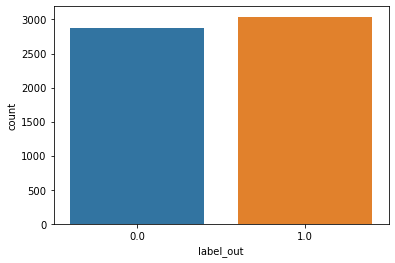

In [114]:
sns.countplot(train_df["label_out"])

In [115]:
main_x = train_df.drop(columns="label_out").to_numpy().astype("float")
main_y = train_df["label_out"].to_numpy().astype("float")

train_x, test_x, train_y, test_y = train_test_split(main_x, main_y, train_size=0.6, stratify=main_y)

# 2. Model Prediction

In [116]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)

test_x_scaled = scaler.transform(test_x)

In [117]:
pca = PCA(n_components=300)
train_x_pca = pca.fit_transform(train_x_scaled)
test_x_pca = pca.transform(test_x_scaled)

### SVM with PCA

In [127]:
clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",C = 0.5, probability = True,gamma = 'scale')
clf_pca.fit(train_x_pca, train_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [128]:
test_yhat = clf_pca.predict_proba(test_x_pca)[:,-1]

In [129]:
metrics.roc_auc_score(test_y, test_yhat)

0.8734288547715945

## 3 Kaggle submission

In [144]:
main_x_scaled = scaler.fit_transform(main_x)

In [145]:
kaggle_test_X = test_df.drop(columns="id_out", inplace=False).to_numpy().astype("float")

kaggle_x_scaled = scaler.fit_transform(kaggle_test_X)

kaggle_test_X.shape

(1479, 3032)

In [146]:
main_x_pca = pca.fit_transform(main_x_scaled)

In [147]:
kaggle_x_pca = pca.transform(kaggle_x_scaled)

In [148]:
testdf_new = test_df["id_out"]

In [149]:
testdf_new = testdf_new.to_frame()

In [150]:
testdf_new["id"] = test_df["id_out"]
testdf_new.drop(columns="id_out",inplace=True)

### SVM with PCA

In [159]:
clf_pca.fit(main_x_pca,main_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [160]:
kaggle_test_yhat = clf_pca.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_svm_pca_sub.csv", index=False)